In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
precios_diarios = {
    "Fecha": [
        "03-Jun-19", "04-Jun-19", "05-Jun-19", "06-Jun-19", "07-Jun-19",
        "10-Jun-19", "11-Jun-19", "12-Jun-19", "13-Jun-19", "14-Jun-19",
        "17-Jun-19", "18-Jun-19", "19-Jun-19", "20-Jun-19", "21-Jun-19",
        "24-Jun-19", "25-Jun-19", "26-Jun-19", "27-Jun-19", "28-Jun-19", "30-Jun-19"
    ],
    "Precio": [
        1.279205, 1.279455, 1.279707, 1.279958, 1.280210,
        1.280956, 1.281204, 1.281451, 1.281698, 1.281946,
        1.282671, 1.282909, 1.283149, 1.283397, 1.283654,
        1.284401, 1.284650, 1.284899, 1.285148, 1.285395, 1.285395
    ]
}

In [3]:
df_precios_diarios = pd.DataFrame(precios_diarios)

In [4]:
df_precios_diarios['Fecha'] = pd.to_datetime(df_precios_diarios['Fecha'], format='%d-%b-%y')

df_rendimientos = df_precios_diarios.copy()

df_rendimientos['Rendimientos'] = df_rendimientos['Precio'].pct_change()*100
df_rendimientos.dropna(inplace=True)

In [5]:
# Cálculos estadísticos: Media, Mediana y Moda
media_rendimiento = df_rendimientos['Rendimientos'].mean()
mediana_rendimiento = df_rendimientos['Rendimientos'].median()

# Como la moda puede no existir en datos continuos, es posible que se retorne un DataFrame vacío.
# Usaremos el método dropna para asegurarnos de tener valores.
moda_rendimiento = df_rendimientos['Rendimientos'].mode()

media_rendimiento, mediana_rendimiento, moda_rendimiento

(0.024140358362353398,
 0.019380833160853594,
 0     0.000000
 1     0.018555
 2     0.018707
 3     0.019220
 4     0.019275
 5     0.019279
 6     0.019327
 7     0.019349
 8     0.019361
 9     0.019379
 10    0.019383
 11    0.019386
 12    0.019543
 13    0.019614
 14    0.019688
 15    0.019696
 16    0.020025
 17    0.056555
 18    0.058193
 19    0.058272
 Name: Rendimientos, dtype: float64)

In [6]:
# Ejercicio 3: Análisis de Volatilidad
# Cálculo de la Desviación Estándar
desviacion_estandar = df_rendimientos['Rendimientos'].std()

# Cálculo del IQR
rango_intercuartilico = iqr(df_rendimientos['Rendimientos'])

# Ejercicio 4: Análisis de Tendencia
# Cálculo de la Media Móvil (SMA) de 5 días
df_rendimientos['Media_Movil_5'] = df_rendimientos['Rendimientos'].rolling(window=5).mean()

# Aplicación de Regresión Lineal
# Preparar datos para regresión
X = np.array(range(len(df_rendimientos))).reshape(-1, 1)  # Días como variable independiente
y = df_rendimientos['Rendimientos'].values.reshape(-1, 1)  # Rendimientos como variable dependiente

# Crear y entrenar el modelo
modelo_lineal = LinearRegression().fit(X, y)
# Predecir los valores de rendimiento basados en el modelo
df_rendimientos['Tendencia'] = modelo_lineal.predict(X)

# Resultados
desviacion_estandar, rango_intercuartilico, df_rendimientos[['Fecha', 'Rendimientos', 'Media_Movil_5', 'Tendencia']].tail()

(0.015087859328367084,
 0.0004122691089514241,
         Fecha  Rendimientos  Media_Movil_5  Tendencia
 16 2019-06-25      0.019386       0.027128   0.022074
 17 2019-06-26      0.019383       0.027263   0.021699
 18 2019-06-27      0.019379       0.027273   0.021323
 19 2019-06-28      0.019220       0.027112   0.020947
 20 2019-06-30      0.000000       0.015474   0.020572)

<function matplotlib.pyplot.show(close=None, block=None)>

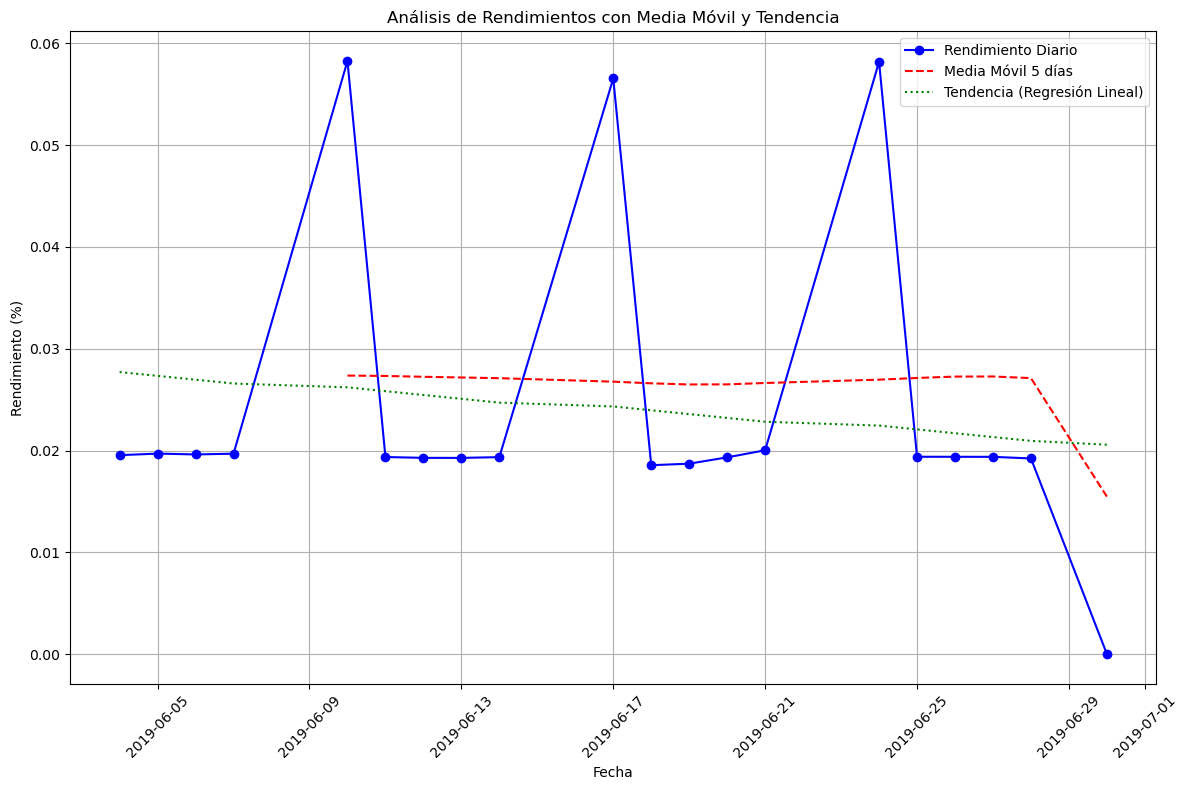

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(df_rendimientos['Fecha'], df_rendimientos['Rendimientos'], label='Rendimiento Diario', marker='o', linestyle='-', color='blue')
plt.plot(df_rendimientos['Fecha'], df_rendimientos['Media_Movil_5'], label='Media Móvil 5 días', linestyle='--', color='red')
plt.plot(df_rendimientos['Fecha'], df_rendimientos['Tendencia'], label='Tendencia (Regresión Lineal)', linestyle=':', color='green')

# Decoraciones del gráfico
plt.title('Análisis de Rendimientos con Media Móvil y Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show